In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/international_match_results.csv', parse_dates=['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42105 entries, 0 to 42104
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        42105 non-null  datetime64[ns]
 1   home_team   42105 non-null  object        
 2   away_team   42105 non-null  object        
 3   home_score  42105 non-null  int64         
 4   away_score  42105 non-null  int64         
 5   tournament  42105 non-null  object        
 6   city        42105 non-null  object        
 7   country     42105 non-null  object        
 8   neutral     42105 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.6+ MB


In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
df['home_team'] = df['home_team'].replace('Republic of Ireland', 'Ireland')
df['away_team'] = df['away_team'].replace('Republic of Ireland', 'Ireland')

df['home_team'] = df['home_team'].replace('Czechoslovakia', 'Czech Republic')
df['away_team'] = df['away_team'].replace('Czechoslovakia', 'Czech Republic')

df['home_team'] = df['home_team'].replace('Yugoslavia', 'Serbia')
df['away_team'] = df['away_team'].replace('Yugoslavia', 'Serbia')

In [6]:
df_1990 = df[df['date'].dt.year > 1990]

In [7]:
all_goals = pd.concat([df_1990['home_score'], df_1990['away_score']])

In [8]:
a = all_goals.value_counts().rename_axis('goals').to_frame('counts').reset_index()

<AxesSubplot:xlabel='goals', ylabel='counts'>

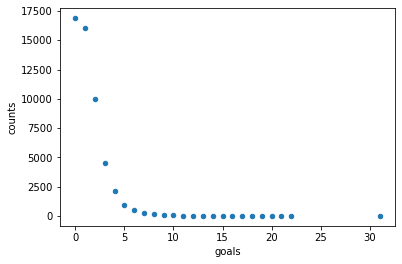

In [9]:
a.plot(kind='scatter', x = 'goals', y = 'counts')

In [10]:
res = sm.Poisson(a['goals'], a['counts']).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 23.131046
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  goals   No. Observations:                   24
Model:                        Poisson   Df Residuals:                       23
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  -3.885
Time:                        07:33:29   Log-Likelihood:                -555.15
converged:                       True   LL-Null:                       -113.65
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
counts      2.392e-05   3.23e-05      0.741      0.459   -3.93e-05    8.72e-05
==============================================================================
"""

# Just Euros

In [11]:
euros = df_1990[(df_1990['tournament'] == 'UEFA Euro') | (df_1990['tournament'] == 'UEFA Euro qualification')]
euros.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
16346,1991-01-23,Greece,Portugal,3,2,UEFA Euro qualification,Athens,Greece,False
16363,1991-02-09,Malta,Portugal,0,1,UEFA Euro qualification,Attard,Malta,False
16371,1991-02-20,France,Spain,3,1,UEFA Euro qualification,Paris,France,False
16372,1991-02-20,Portugal,Malta,5,0,UEFA Euro qualification,Porto,Portugal,False
16374,1991-02-27,Belgium,Luxembourg,3,0,UEFA Euro qualification,Brussels,Belgium,False


In [12]:
euros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 16346 to 41564
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2040 non-null   datetime64[ns]
 1   home_team   2040 non-null   object        
 2   away_team   2040 non-null   object        
 3   home_score  2040 non-null   int64         
 4   away_score  2040 non-null   int64         
 5   tournament  2040 non-null   object        
 6   city        2040 non-null   object        
 7   country     2040 non-null   object        
 8   neutral     2040 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 145.4+ KB


In [13]:
euros['total_score'] = euros['home_score'] + euros['away_score']
euros['home_diff'] = euros['home_score'] - euros['away_score']

/Users/msternke/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/msternke/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
euros

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score,home_diff
16346,1991-01-23,Greece,Portugal,3,2,UEFA Euro qualification,Athens,Greece,False,5,1
16363,1991-02-09,Malta,Portugal,0,1,UEFA Euro qualification,Attard,Malta,False,1,-1
16371,1991-02-20,France,Spain,3,1,UEFA Euro qualification,Paris,France,False,4,2
16372,1991-02-20,Portugal,Malta,5,0,UEFA Euro qualification,Porto,Portugal,False,5,5
16374,1991-02-27,Belgium,Luxembourg,3,0,UEFA Euro qualification,Brussels,Belgium,False,3,3
...,...,...,...,...,...,...,...,...,...,...,...
41560,2019-11-19,Poland,Slovenia,3,2,UEFA Euro qualification,Warsaw,Poland,False,5,1
41561,2019-11-19,Latvia,Austria,1,0,UEFA Euro qualification,Riga,Latvia,False,1,1
41562,2019-11-19,Scotland,Kazakhstan,3,1,UEFA Euro qualification,Glasgow,Scotland,False,4,2
41563,2019-11-19,Belgium,Cyprus,6,1,UEFA Euro qualification,Brussels,Belgium,False,7,5


In [15]:
elos = pd.read_csv('../data/team_elos_over_time.csv', usecols=['date', 'team', 'rating'], 
                 parse_dates=['date'], dtype={'rating': int})


In [16]:
elos = elos.drop_duplicates(subset=['team', 'date'], keep='last')
elos['team'] = elos['team'].replace('Soviet Union', 'Russia')
elos['team'] = elos['team'].replace('Czechoslovakia', 'Czech Republic')
elos['team'] = elos['team'].replace('Czechia', 'Czech Republic')
elos['team'] = elos['team'].replace('Macedonia', 'North Macedonia')
elos['team'] = elos['team'].replace('Yugoslavia', 'Serbia')

In [20]:
def elo_diff_game(result_df, elo_df):
    goals = []
    elo_diff = []
    
    for i, row in result_df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        game_date = row['date']
        
        home_elo_df  = elo_df[elo_df['team'] == home_team].set_index('date')
        home_resampled = home_elo_df.resample('d').pad()
        home_elo = home_resampled.loc[game_date]['rating']
        
        away_elo_df  = elo_df[elo_df['team'] == away_team].set_index('date')        
        away_resampled = away_elo_df.resample('d').pad()
        away_elo = away_resampled.loc[game_date]['rating']
        
        game_elo_diff = home_elo - away_elo
        
        goals.append(row['home_score'])
        elo_diff.append(game_elo_diff)
        
        goals.append(row['away_score'])
        elo_diff.append(-1 * game_elo_diff)
        
    return(pd.DataFrame({'goal_scored': goals, 'elo_diff': elo_diff}))
        
goal_elo_df = elo_diff_game(euros, elos)

<AxesSubplot:ylabel='Frequency'>

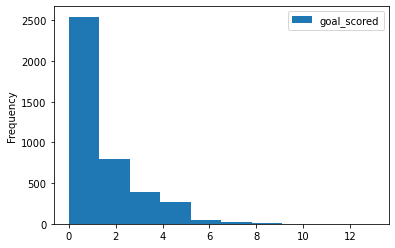

In [88]:
goal_elo_df.plot.hist(x='elo_diff')

<AxesSubplot:xlabel='elo_diff', ylabel='goal_scored'>

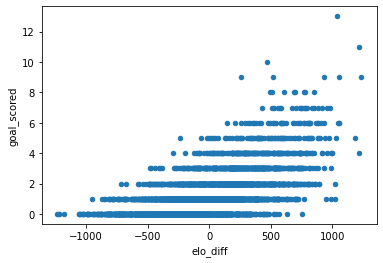

In [21]:
goal_elo_df.plot.scatter(x='elo_diff', y='goal_scored')

In [22]:
X = sm.add_constant(goal_elo_df['elo_diff'])
y = goal_elo_df['goal_scored']

res = sm.GLM(y, X, family=sm.families.Poisson()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            goal_scored   No. Observations:                 4080
Model:                            GLM   Df Residuals:                     4078
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5502.6
Date:                Tue, 01 Jun 2021   Deviance:                       4211.7
Time:                        07:37:01   Pearson chi2:                 3.81e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1071      0.016      6.708      0.000       0.076       0.138
elo_diff       0.0017   3.56e-05     48.456      0.000       0.002       0.002
==============================================================================
"""

In [23]:
res.params

const       0.107132
elo_diff    0.001727
dtype: float64

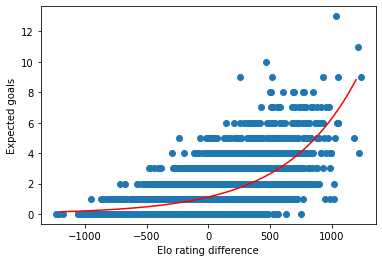

In [32]:
x = np.arange(-1200, 1200)
fig, ax = plt.subplots(facecolor='white')
ax.plot(x, np.exp(x*res.params['elo_diff'] + res.params['const']), color = 'r')
ax.scatter(goal_elo_df['elo_diff'], goal_elo_df['goal_scored'])
ax.set_xlabel('Elo rating difference')
ax.set_ylabel('Expected goals')
plt.show()

In [86]:
import scipy.stats as ss

mu1 = np.exp(100*res.params['elo_diff'] + res.params['const'])
mu2 = np.exp(-100*res.params['elo_diff'] + res.params['const'])

print(mu1, mu2)

goals1 = ss.poisson.rvs(mu1, size=1000)
goals2 = ss.poisson.rvs(mu2, size=1000)
results = goals1 - goals2

print(len(np.where(results > 0)[0]) / len(results))
print(len(np.where(results == 0)[0]) / len(results))
print(len(np.where(results < 0)[0]) / len(results))


1.3229213547885403 0.9365260335572295
0.454
0.292
0.254
